In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
import mysql.connector as conn
import warnings
warnings.filterwarnings("always")


In [4]:
def get_databases():

    mydb = conn.connect(
        username = "root",
        password = ""
    )

    cur = mydb.cursor()
    cur.execute("show databases")
    data = cur.fetchall()
    return data

print(get_databases())

[('anime',), ('api',), ('assignment',), ('business',), ('car',), ('city_data',), ('faisal',), ('faisal1',), ('family',), ('ggg',), ('info',), ('info1',), ('information_schema',), ('join_operation',), ('lets_try',), ('mysql',), ('naruto',), ('newproject',), ('performance_schema',), ('person',), ('sakila',), ('sales',), ('sql_practise',), ('sys',), ('uciproject',), ('world',)]


In [5]:
def get_table_name():

    mydb = conn.connect(
        username = "root",
        password = ""
    )

    cur = mydb.cursor()
    cur.execute("use car")
    cur.execute("show tables")
    table = cur.fetchall()
    return table

print(get_table_name())

[('car_data',)]


In [6]:
def get_sql_data():

    mydb = conn.connect(
        username = "root",
        password = ""
    )

    cur = mydb.cursor()
    cur.execute("use car")
    
    data = pd.read_sql_query("select * from car_data",mydb)
    print(data.head())

    return data

df = get_sql_data()


C:\Users\solat\AppData\Local\Temp\ipykernel_6052\1822750847.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query("select * from car_data",mydb)


  company_name model_name    price  model_year   location  mileage  \
0       Toyota       Vitz  2385000        2017  Islamabad     9869   
1       Toyota    Corolla   111000        2019        KPK    11111   
2       Suzuki       Alto  1530000        2019        KPK    17500   
3       Suzuki       Alto  1650000        2019     Punjab     9600   
4       Toyota    Corolla  1435000        2010  Islamabad   120000   

  engine_type  engine_capacity   color  assembly  body_type transmission_type  \
0      Petrol             1000  Silver  Imported  Hatchback         Automatic   
1      Petrol             1300   White     Local      Sedan         Automatic   
2      Petrol              660   White     Local  Hatchback         Automatic   
3      Petrol              660   White     Local  Hatchback            Manual   
4      Petrol             1300   Black     Local      Sedan            Manual   

  registration_status  
0       Un-Registered  
1          Registered  
2       Un-Registere

In [7]:
df.head()

,company_name,model_name,price,model_year,location,mileage,engine_type,engine_capacity,color,assembly,body_type,transmission_type,registration_status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


In [8]:
df.isna().sum()

company_name           0
model_name             0
price                  0
model_year             0
location               0
mileage                0
engine_type            0
engine_capacity        0
color                  0
assembly               0
body_type              0
transmission_type      0
registration_status    0
dtype: int64

In [9]:
df.dtypes

company_name           object
model_name             object
price                   int64
model_year              int64
location               object
mileage                 int64
engine_type            object
engine_capacity         int64
color                  object
assembly               object
body_type              object
transmission_type      object
registration_status    object
dtype: object

In [10]:
len(df.columns)

13

In [11]:
object_columns = df.dtypes[df.dtypes == "O"]

In [12]:
numerical_columns = df.dtypes[df.dtypes != "O"]
numerical_columns

price              int64
model_year         int64
mileage            int64
engine_capacity    int64
dtype: object

In [13]:
len(object_columns) + len(numerical_columns)

13

In [14]:
def get_nunique():
    for i in df.columns:
        uni = df[i].nunique()
        print(f"{i} has unique values {uni}")

get_nunique()

company_name has unique values 31
model_name has unique values 196
price has unique values 1419
model_year has unique values 30
location has unique values 6
mileage has unique values 5573
engine_type has unique values 3
engine_capacity has unique values 75
color has unique values 24
assembly has unique values 2
body_type has unique values 6
transmission_type has unique values 2
registration_status has unique values 2


<BarContainer object of 46022 artists>

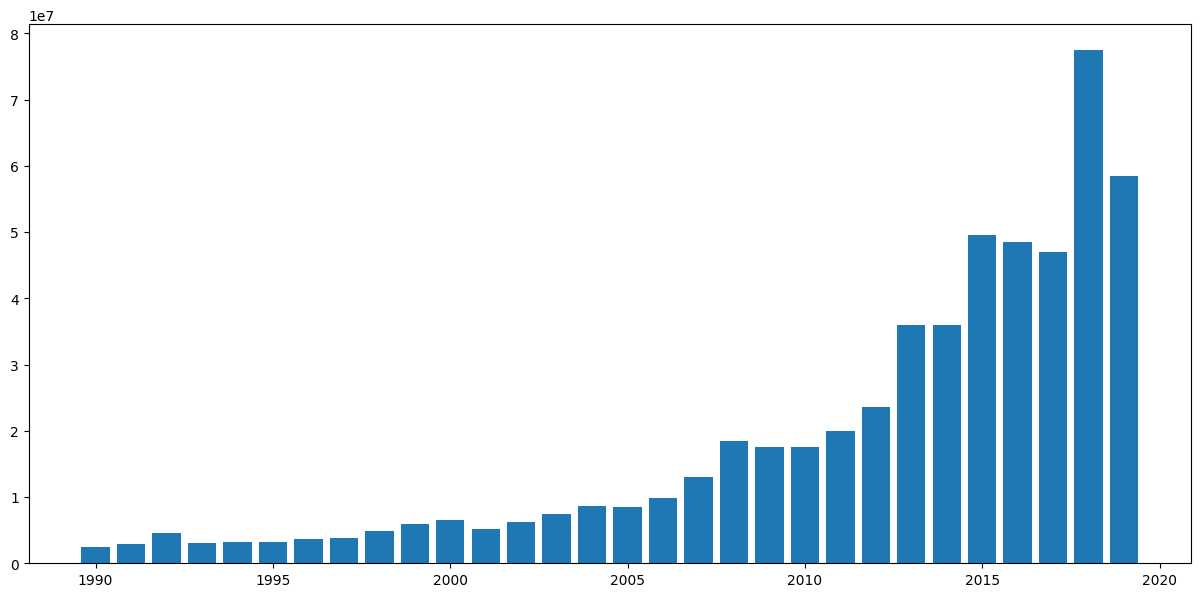

In [15]:
fig , ax = plt.subplots(figsize=(15,7))
ax.bar(df["model_year"], df["price"])

<BarContainer object of 46022 artists>

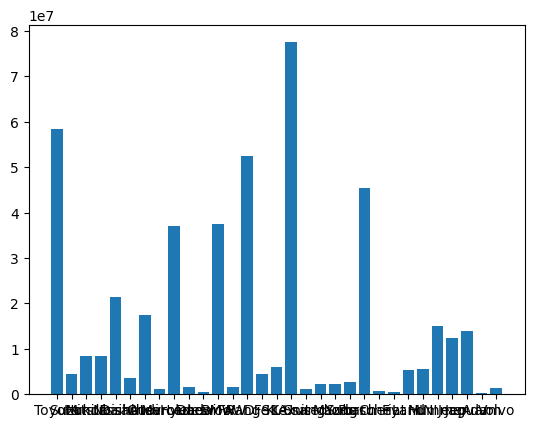

In [16]:
fig , ax = plt.subplots()
ax.bar(df["company_name"], df["price"])


In [19]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
company_name,Toyota,Toyota,Suzuki,Suzuki,Toyota,Honda,Suzuki,Mitsubishi,Toyota,Honda,Honda,Honda,Honda,Suzuki,Toyota,Honda,Honda,Toyota,Suzuki,Honda
model_name,Vitz,Corolla,Alto,Alto,Corolla,Civic,Wagon,Mirage,Prado,Civic,Vezel,City,N,Cultus,Corolla,N,City,Fortuner,Wagon,City
price,2385000,111000,1530000,1650000,1435000,3850000,1440000,1425000,2650000,3350000,3200000,1990000,185000,920000,2750000,1150000,910000,8650000,1625000,2100000
model_year,2017,2019,2019,2019,2010,2017,2017,2012,1998,2017,2014,2017,2016,2012,2018,2017,2004,2018,2016,2016
location,Islamabad,KPK,KPK,Punjab,Islamabad,Punjab,Punjab,Punjab,Punjab,Punjab,Sindh,Punjab,Punjab,Punjab,Punjab,Punjab,Punjab,Punjab,Punjab,Punjab
mileage,9869,11111,17500,9600,120000,22000,31000,101000,110000,60000,91000,75000,20000,83000,51240,100000,150000,35000,45000,58000
engine_type,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Hybrid,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Petrol
engine_capacity,1000,1300,660,660,1300,1500,1000,1000,3000,1800,1500,1300,660,1000,1300,660,1300,2800,660,1300
color,Silver,White,White,White,Black,Black,White,Black,Beige,White,Black,White,Black,Grey,White,Black,Grey,White,Brown,White
assembly,Imported,Local,Local,Local,Local,Local,Local,Imported,Imported,Local,Imported,Local,Imported,Local,Local,Imported,Local,Local,Imported,Local


In [20]:
get_nunique()

company_name has unique values 31
model_name has unique values 196
price has unique values 1419
model_year has unique values 30
location has unique values 6
mileage has unique values 5573
engine_type has unique values 3
engine_capacity has unique values 75
color has unique values 24
assembly has unique values 2
body_type has unique values 6
transmission_type has unique values 2
registration_status has unique values 2


In [23]:
gr = df.groupby("company_name")
gt = gr.get_group("Toyota")
gt.price.sum()

46608818000

In [27]:
def get_grp_by():

    grp = df.groupby("company_name")
    total_amount = {}
    for i in df["company_name"].unique():
        gt_grp = grp.get_group(i)
        total_amount[i] = gt_grp["price"].sum()

    return total_amount

company_sales = get_grp_by()

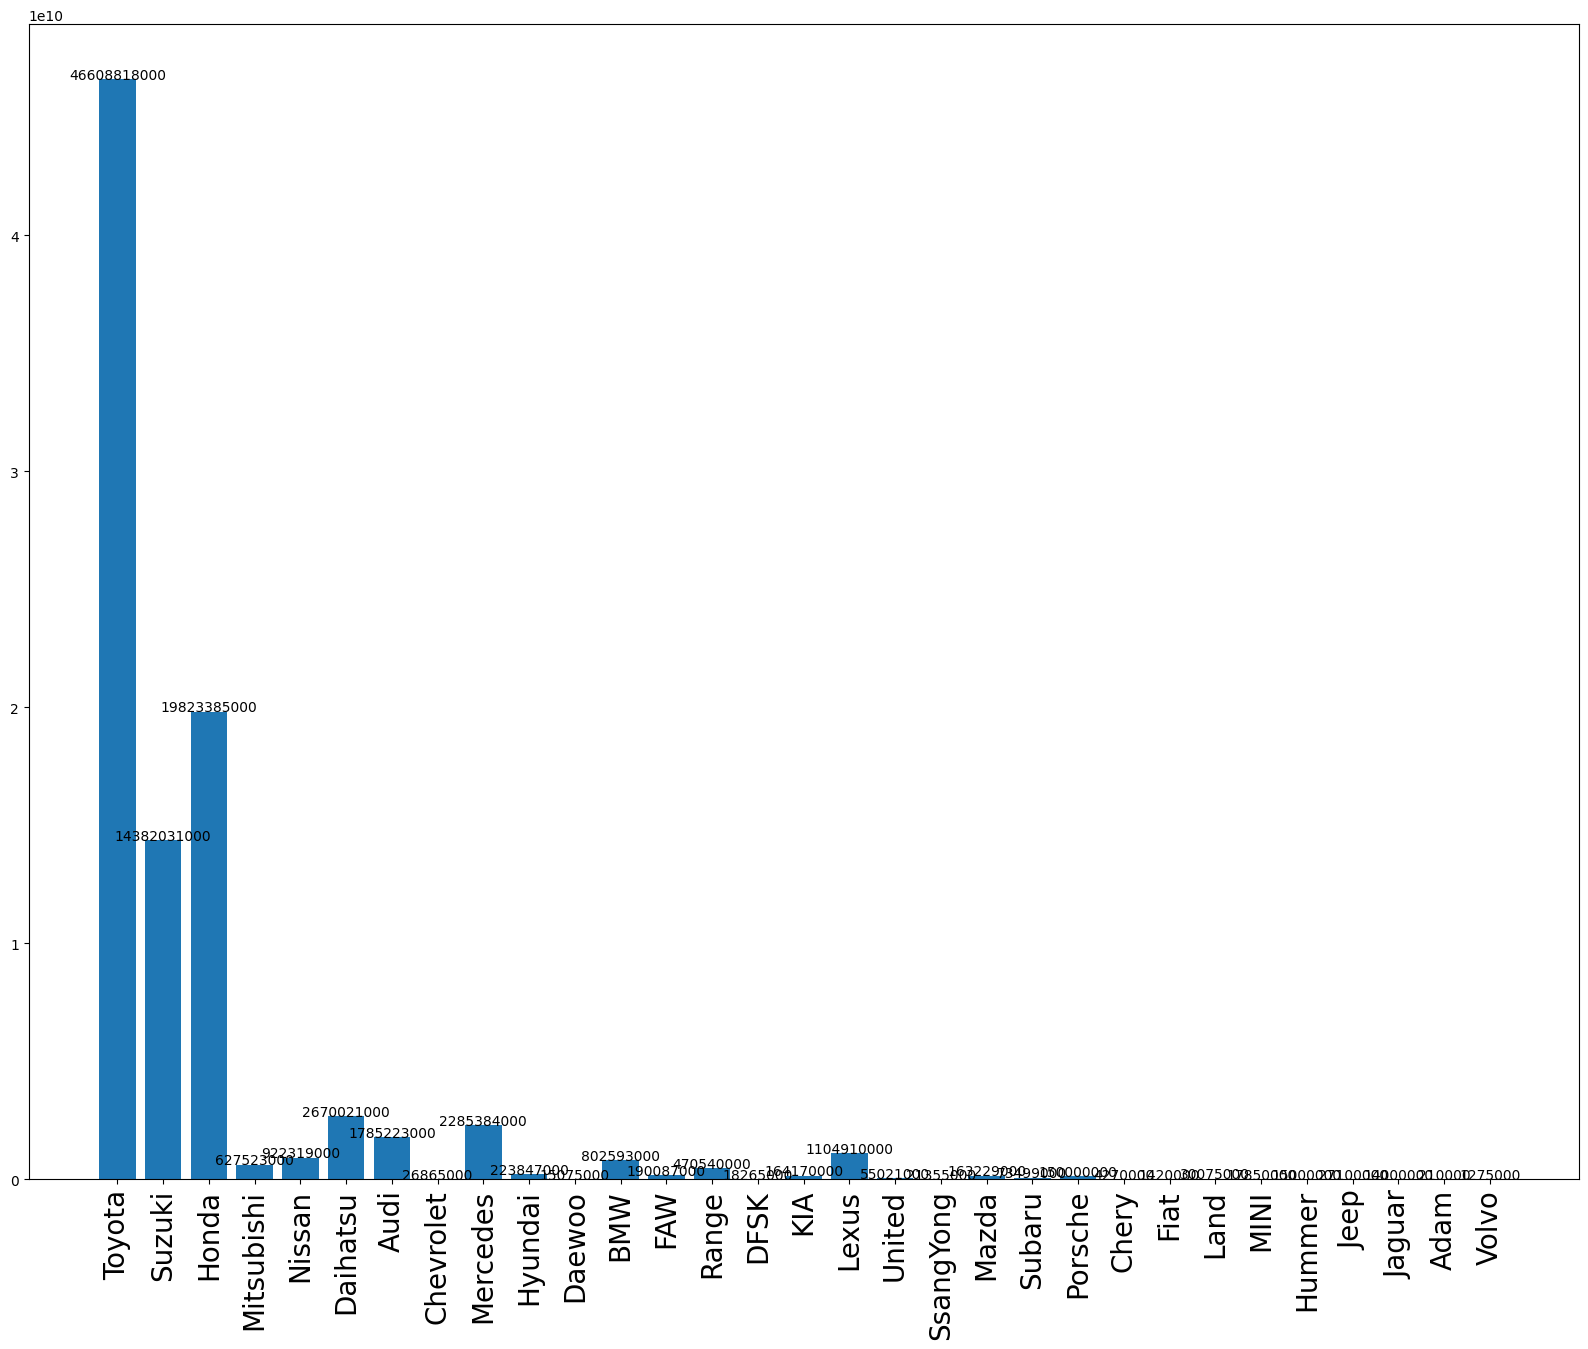

In [43]:
fig, ax = plt.subplots(figsize=(20,15))
ax.bar(company_sales.keys(),company_sales.values())

patches = ax.patches

for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height() + 1
    ax.annotate(f"{list(company_sales.values())[i]}", (x,y),ha="center")
    ax.tick_params(axis="x",labelsize=20)
    ax.set_xticks(range(len(list(company_sales.keys()))),company_sales.keys(),rotation=90)


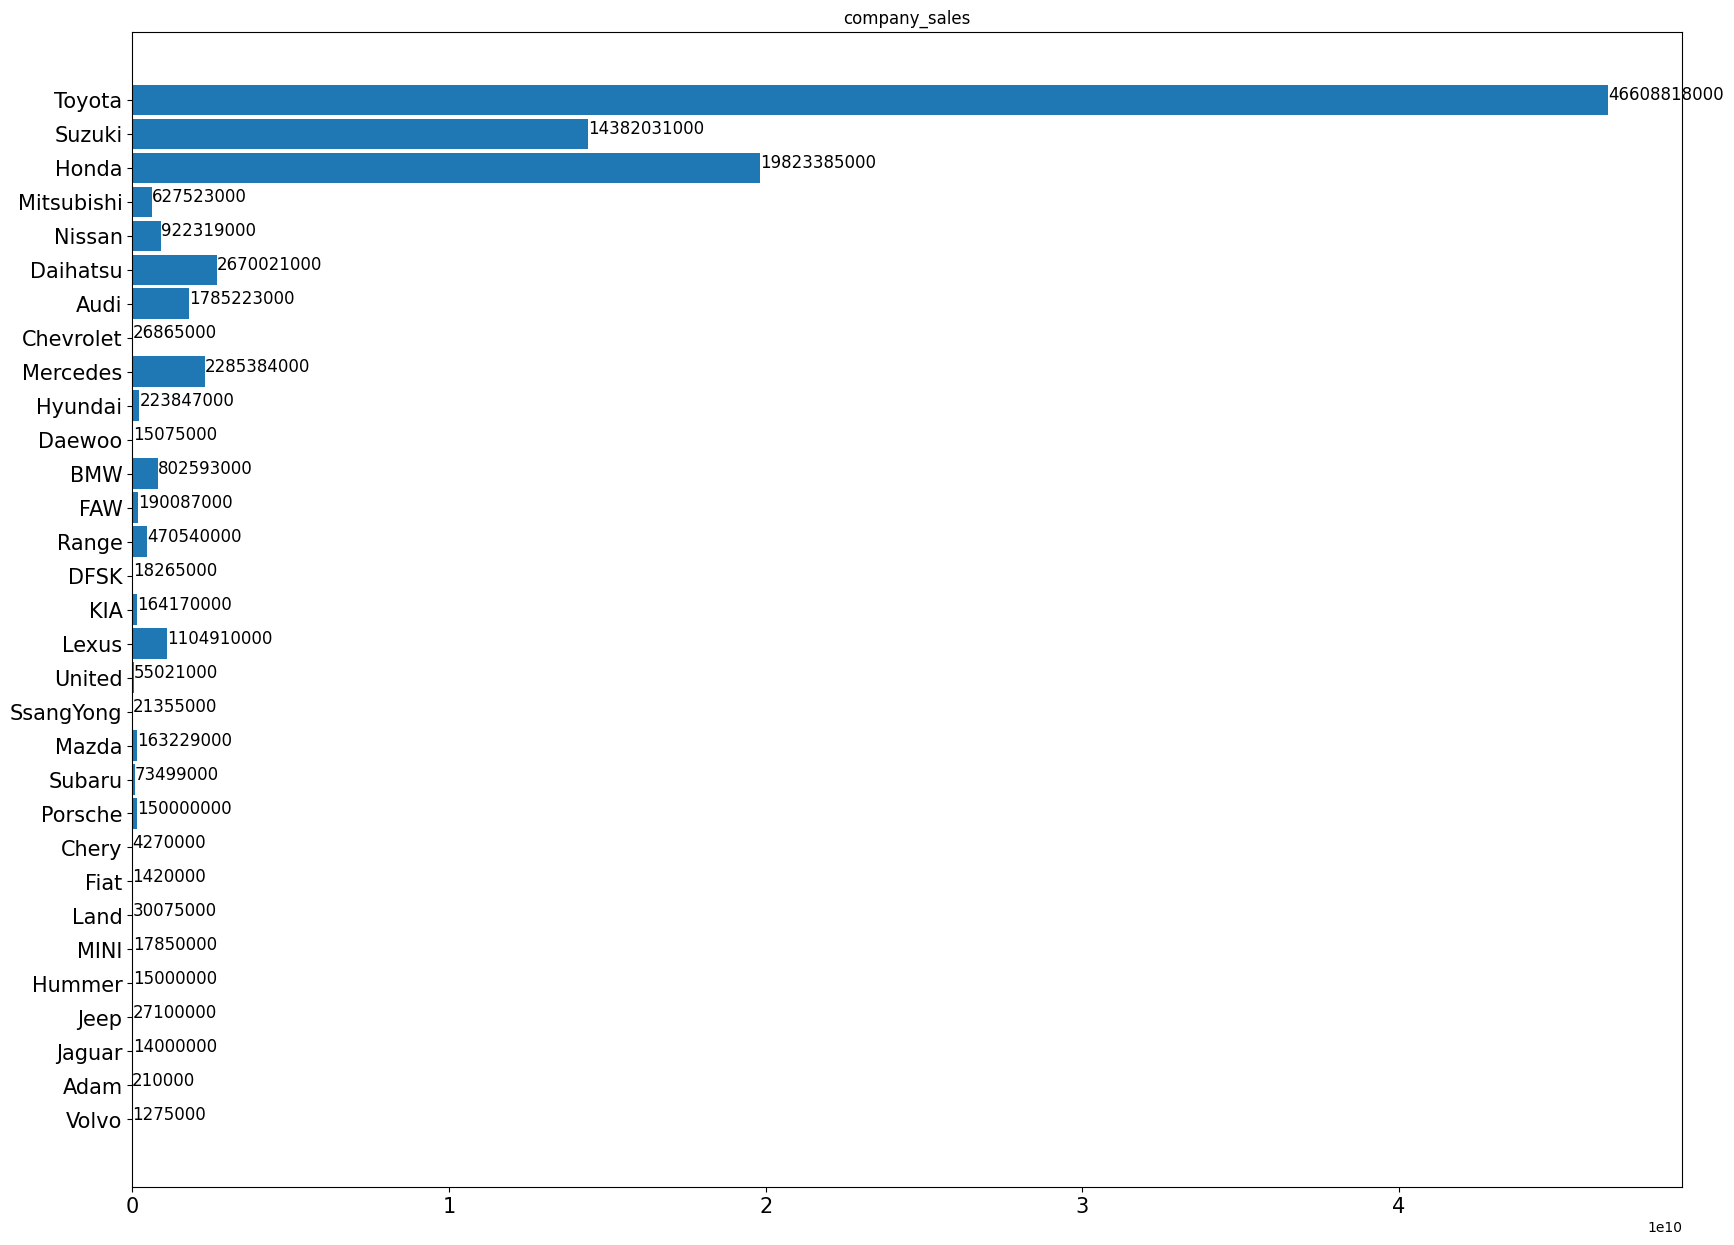

In [93]:
fig, ax = plt.subplots(figsize=(20,15))
y_pos = range(len(list(company_sales.keys())))
performance = company_sales.values()
ax.barh(y_pos,performance,height=0.9)
ax.set_yticks(y_pos, labels=list(company_sales.keys()))
ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel("Company Names")
ax.set_title("company_sales")


patches = ax.patches

for i in range(len(patches)):
    x = patches[i].get_width()
    y = patches[i].get_y() + patches[i].get_height() / 2
    ax.annotate(list(company_sales.values())[i],(x,y),ha="left",fontsize=12)
    ax.tick_params(axis="both",labelsize=15)
  



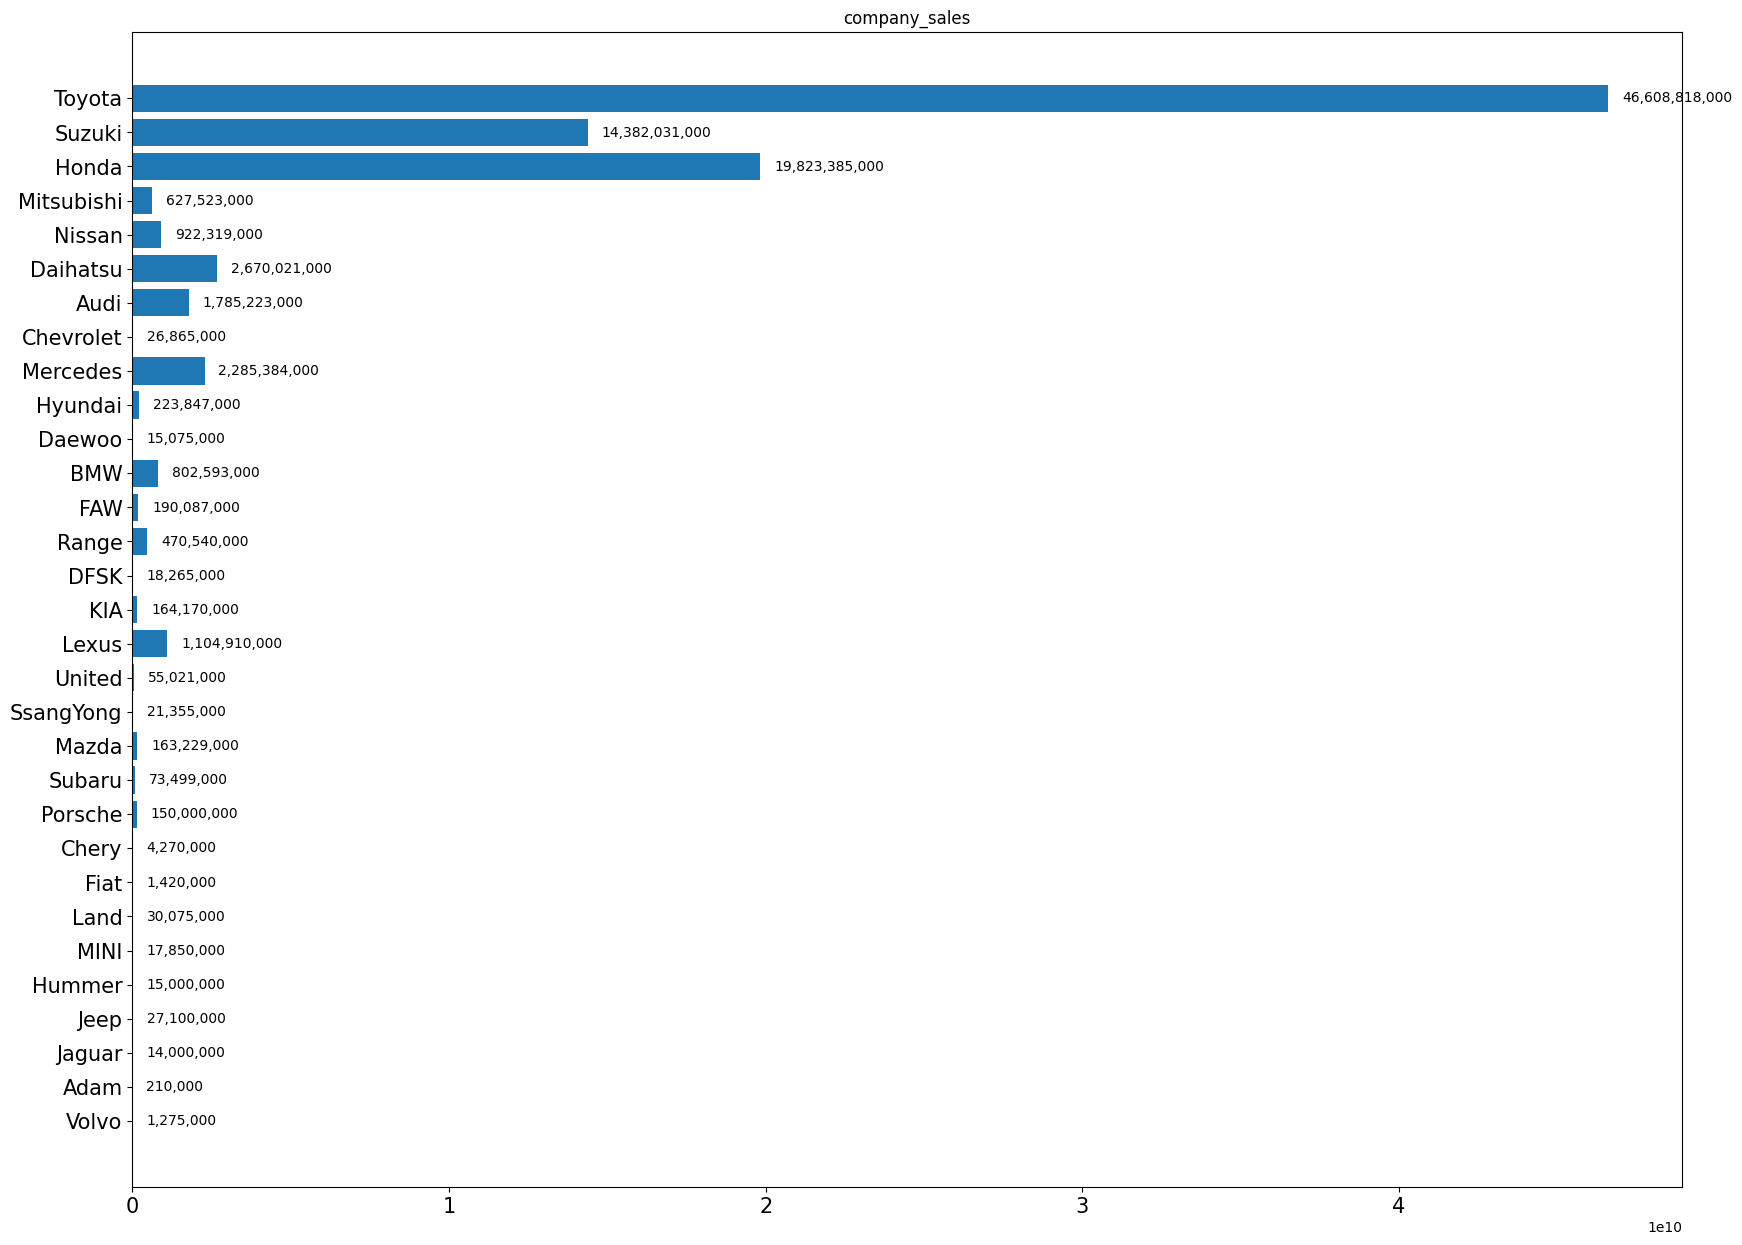

In [83]:
fig, ax = plt.subplots(figsize=(20,15))
y_pos = range(len(list(company_sales.keys())))
performance = company_sales.values()
ax.barh(y_pos,performance)
ax.set_yticks(y_pos, labels=list(company_sales.keys()))
ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel("Company Names")
ax.set_title("company_sales")      
ax.tick_params(axis="both", labelsize=15)  


rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = 10
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'black')            # Change label color to white
    

In [98]:
gt.model_year.unique()

array([2017, 2019, 2010, 1998, 2018, 2001, 2016, 2011, 2014, 2005, 2006,
       2012, 2015, 2008, 1994, 2007, 2013, 2003, 2000, 2004, 1999, 2009,
       2002, 1993, 1992, 1997, 1996, 1990, 1991, 1995], dtype=int64)

In [101]:
df[df.duplicated()]

,company_name,model_name,price,model_year,location,mileage,engine_type,engine_capacity,color,assembly,body_type,transmission_type,registration_status
600,Daihatsu,Mira,1345000,2014,Sindh,77000,Petrol,660,Beige,Imported,Hatchback,Automatic,Registered
1319,Suzuki,Swift,1450000,2013,Sindh,81939,Petrol,1300,Silver,Local,Hatchback,Automatic,Registered
1684,Honda,City,2065000,2017,Punjab,52000,Petrol,1300,Black,Local,Sedan,Manual,Registered
1813,Suzuki,Wagon,1300000,2011,Punjab,150000,Petrol,660,Black,Imported,Hatchback,Automatic,Registered
1896,Toyota,Corolla,2100000,2016,Punjab,92000,Petrol,1300,Grey,Local,Sedan,Manual,Registered
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45835,Suzuki,Mehran,450000,2007,Punjab,75000,Petrol,800,Blue,Local,Hatchback,Manual,Registered
45846,Suzuki,Cultus,540000,2006,Sindh,126000,Petrol,1000,Black,Local,Hatchback,Manual,Registered
45889,Suzuki,Wagon,1550000,2018,Punjab,38000,Petrol,1000,White,Local,Hatchback,Manual,Registered
45993,Toyota,Corolla,1680000,2012,Sindh,28000,Petrol,1300,White,Local,Sedan,Manual,Registered


In [102]:
df.head(20)

,company_name,model_name,price,model_year,location,mileage,engine_type,engine_capacity,color,assembly,body_type,transmission_type,registration_status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered
5,Honda,Civic,3850000,2017,Punjab,22000,Petrol,1500,Black,Local,Sedan,Automatic,Registered
6,Suzuki,Wagon,1440000,2017,Punjab,31000,Petrol,1000,White,Local,Hatchback,Manual,Registered
7,Mitsubishi,Mirage,1425000,2012,Punjab,101000,Petrol,1000,Black,Imported,Hatchback,Automatic,Registered
8,Toyota,Prado,2650000,1998,Punjab,110000,Diesel,3000,Beige,Imported,SUV,Automatic,Registered
9,Honda,Civic,3350000,2017,Punjab,60000,Petrol,1800,White,Local,Sedan,Automatic,Registered


In [103]:
get_nunique()

company_name has unique values 31
model_name has unique values 196
price has unique values 1419
model_year has unique values 30
location has unique values 6
mileage has unique values 5573
engine_type has unique values 3
engine_capacity has unique values 75
color has unique values 24
assembly has unique values 2
body_type has unique values 6
transmission_type has unique values 2
registration_status has unique values 2


In [104]:
object_columns

company_name           object
model_name             object
location               object
engine_type            object
color                  object
assembly               object
body_type              object
transmission_type      object
registration_status    object
dtype: object